<a href="https://colab.research.google.com/github/lashkami2020/E.J.L/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Prediction using Machine Learning**


Diabetes refers to a collection of metabolic disorders characterized by elevated blood sugar levels persisting over an extended period. Symptoms associated with high blood sugar levels include frequent urination, heightened thirst, and increased appetite. Without proper treatment, diabetes can lead to various complications. Acute complications may involve conditions such as diabetic ketoacidosis, hyperosmolar hyperglycemic state, or even mortality. Furthermore, severe long-term consequences encompass cardiovascular ailments, strokes, chronic kidney ailments, foot ulcers, and vision impairment.

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

Number of Observation Units: 768

Variable Number: 9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


Reading the dataset which is the CSV format


In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


let’s check that if our dataset have null values or not

In [ ]:
df.isnull().head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

**Data Visalization**

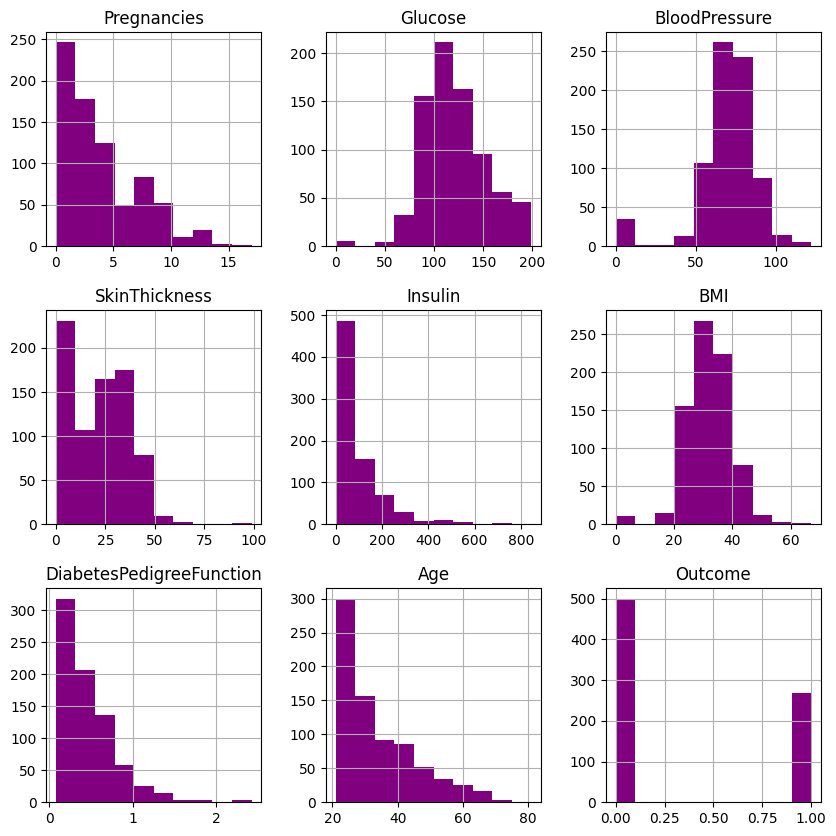

In [ ]:



df.hist(figsize=(10, 10), color="purple")

# Show plot
plt.show()


 The best way to start the analysis of the dataset is to shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

 Now we will be imputing the mean value of the column to each missing value of that particular column.

 Plotting the distributions after removing the NAN values.

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

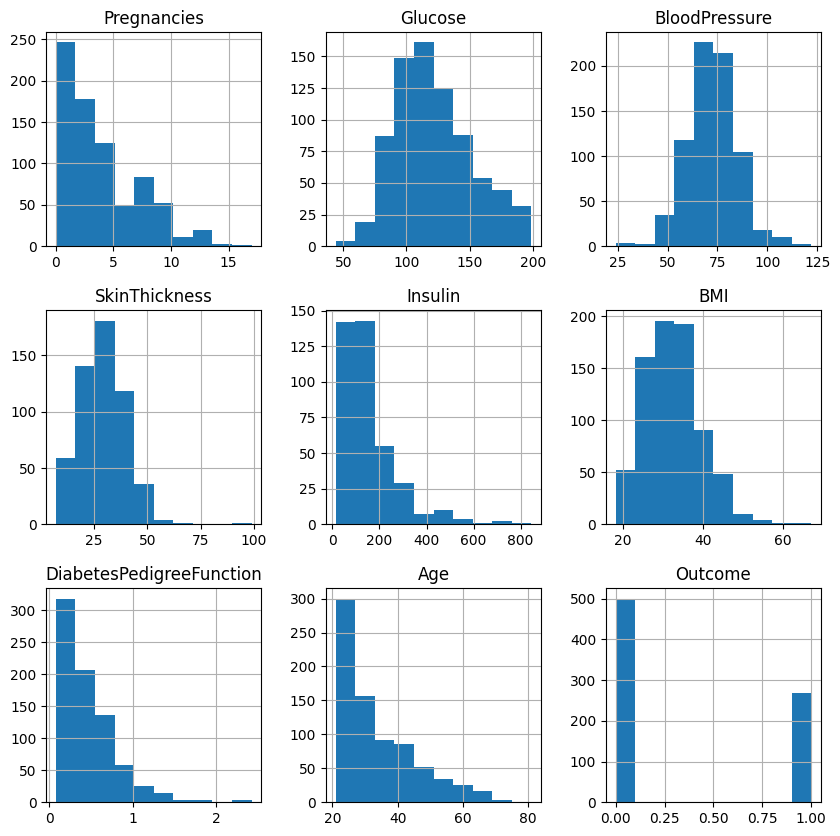

In [ ]:
p = df_copy.hist(figsize = (10,10))

Now we can clearly see that there are no null values in the dataset.

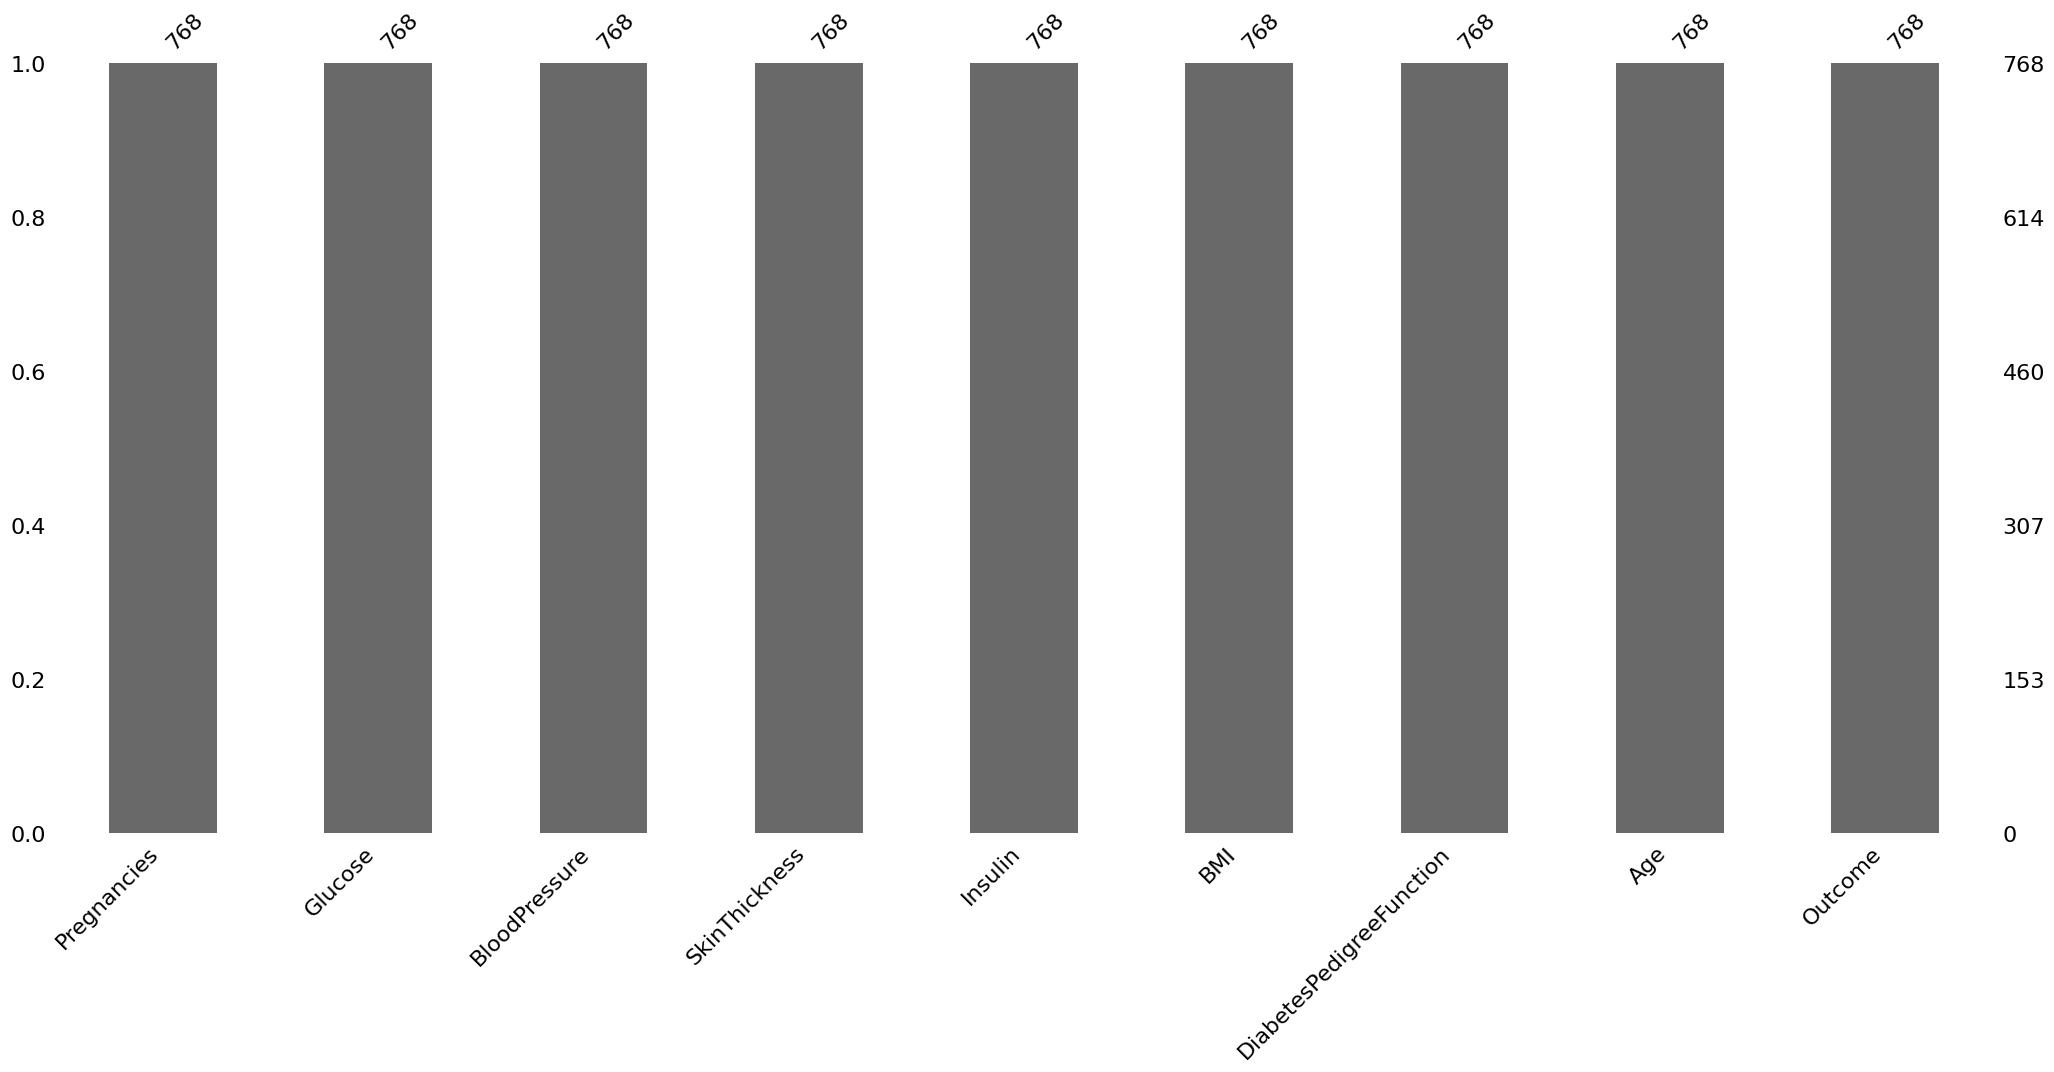

In [ ]:
import missingno as msno
p = msno.bar(df)

Now, let’s check that how well our outcome column is balanced

0    500
1    268
Name: Outcome, dtype: int64


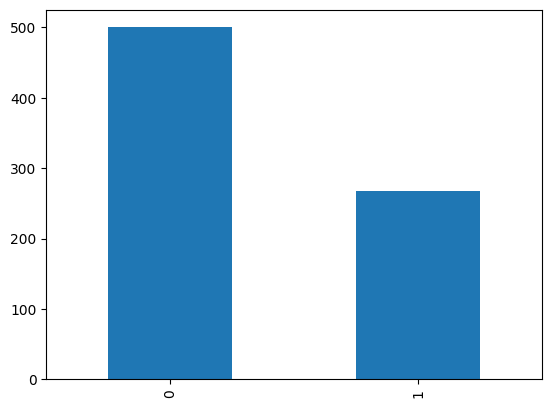

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

According above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

<ipython-input-21-1d062345beba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Insulin'])


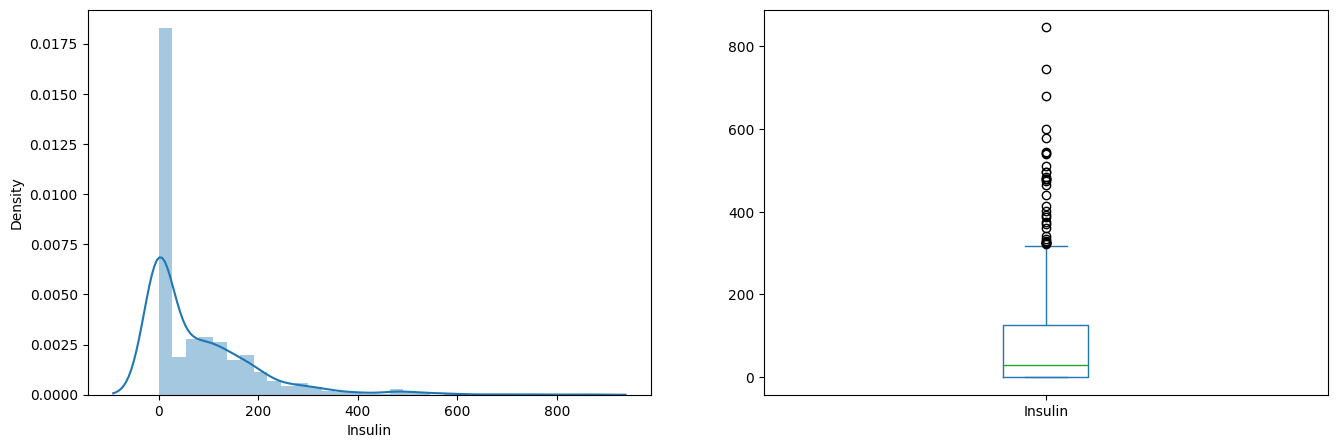

In [ ]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

Correlation between all the features before cleaning

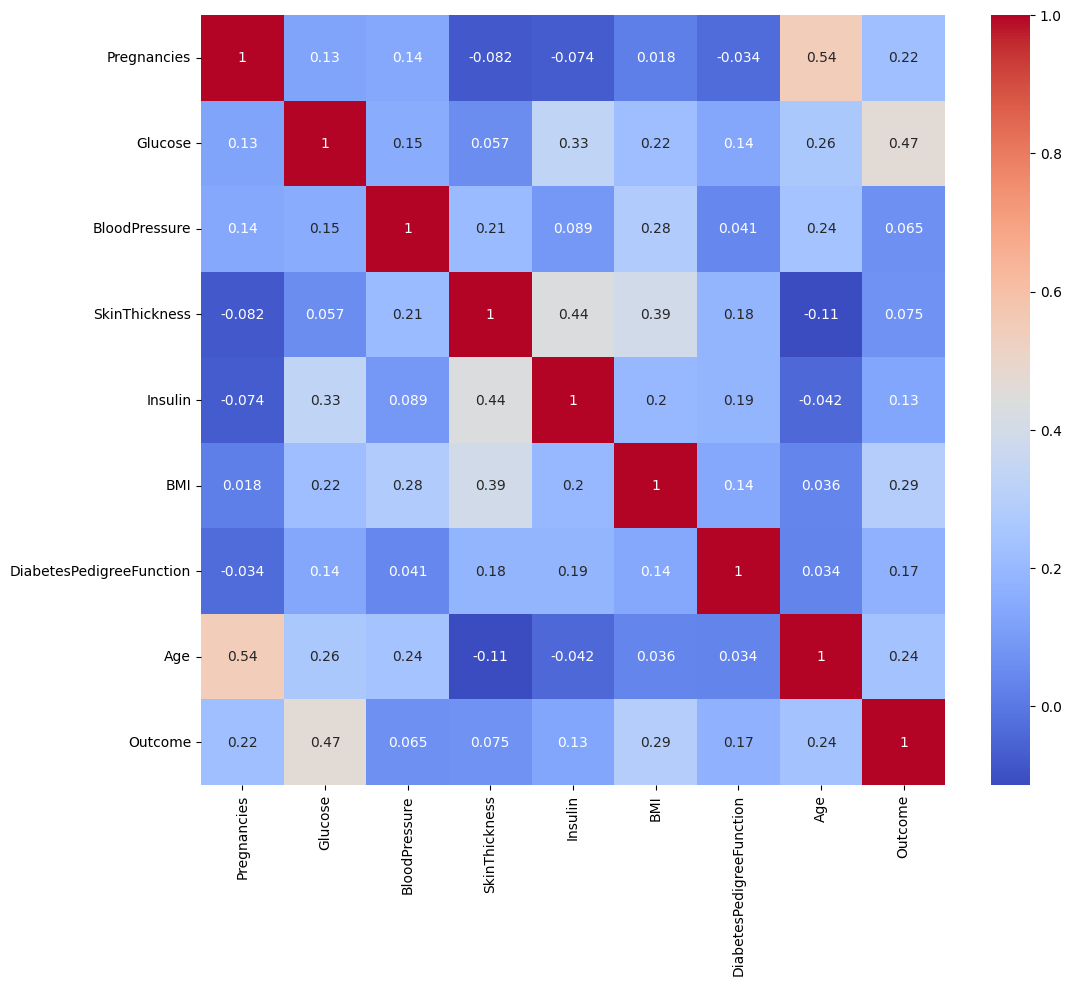

In [ ]:

plt.figure(figsize=(12, 10))
# Specify the colormap using the cmap parameter
p = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


**Model Building**

Splitting the dataset

In [ ]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Normalize


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Train / Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [ ]:
x_test.shape, y_test.shape

((154, 8), (154,))

***Naive Bayes***

Building the model using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

acc_train, acc_test

(0.7687296416938111, 0.7467532467532467)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

confusion_matrix(y_test, y_pred_test)

array([[83, 17],
       [22, 32]])

In [ ]:
precision_score(y_test, y_pred_test)

0.6530612244897959

In [ ]:
precision_score(y_train, y_pred_train)

0.6855670103092784

In [ ]:
recall_score(y_test, y_pred_test)

0.5925925925925926

In [ ]:
recall_score(y_train, y_pred_train)

0.6214953271028038

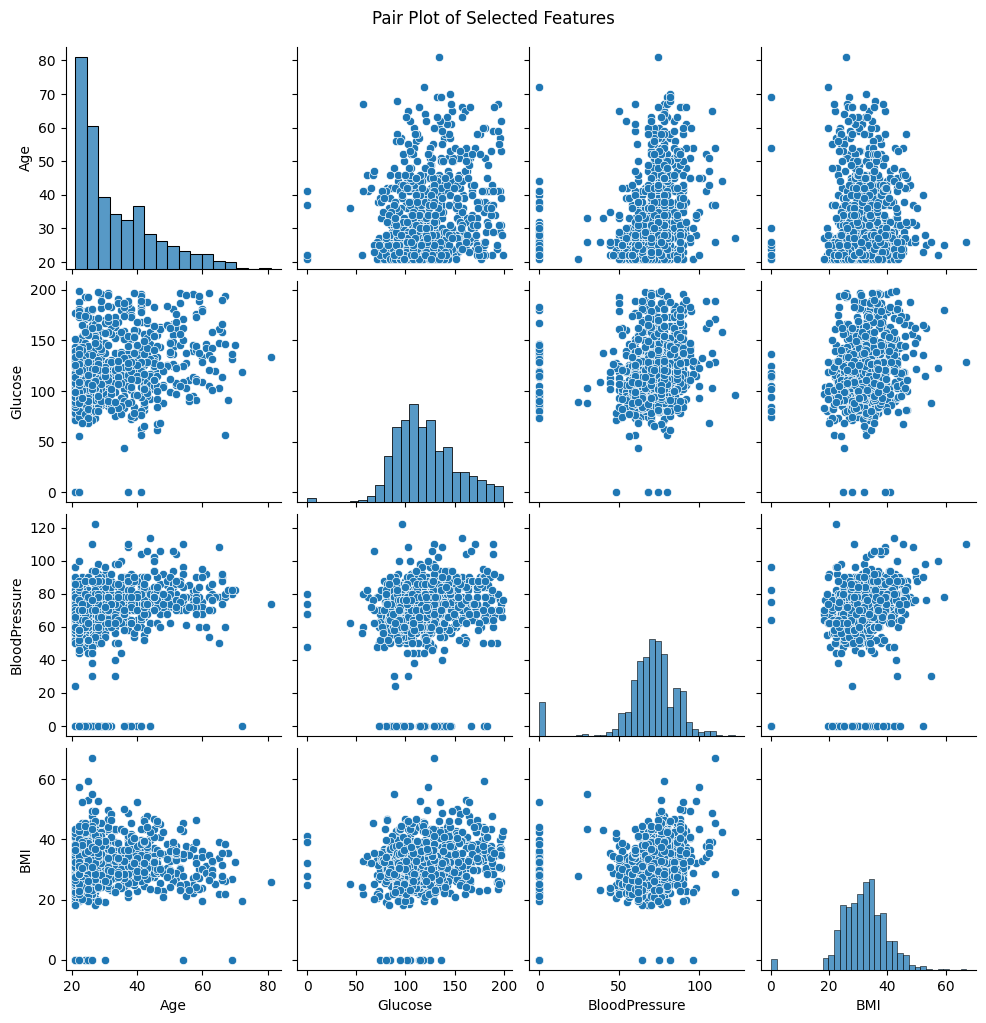

In [ ]:
selected_features = ['Age', 'Glucose', 'BloodPressure', 'BMI']
# Create a pair plot
sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


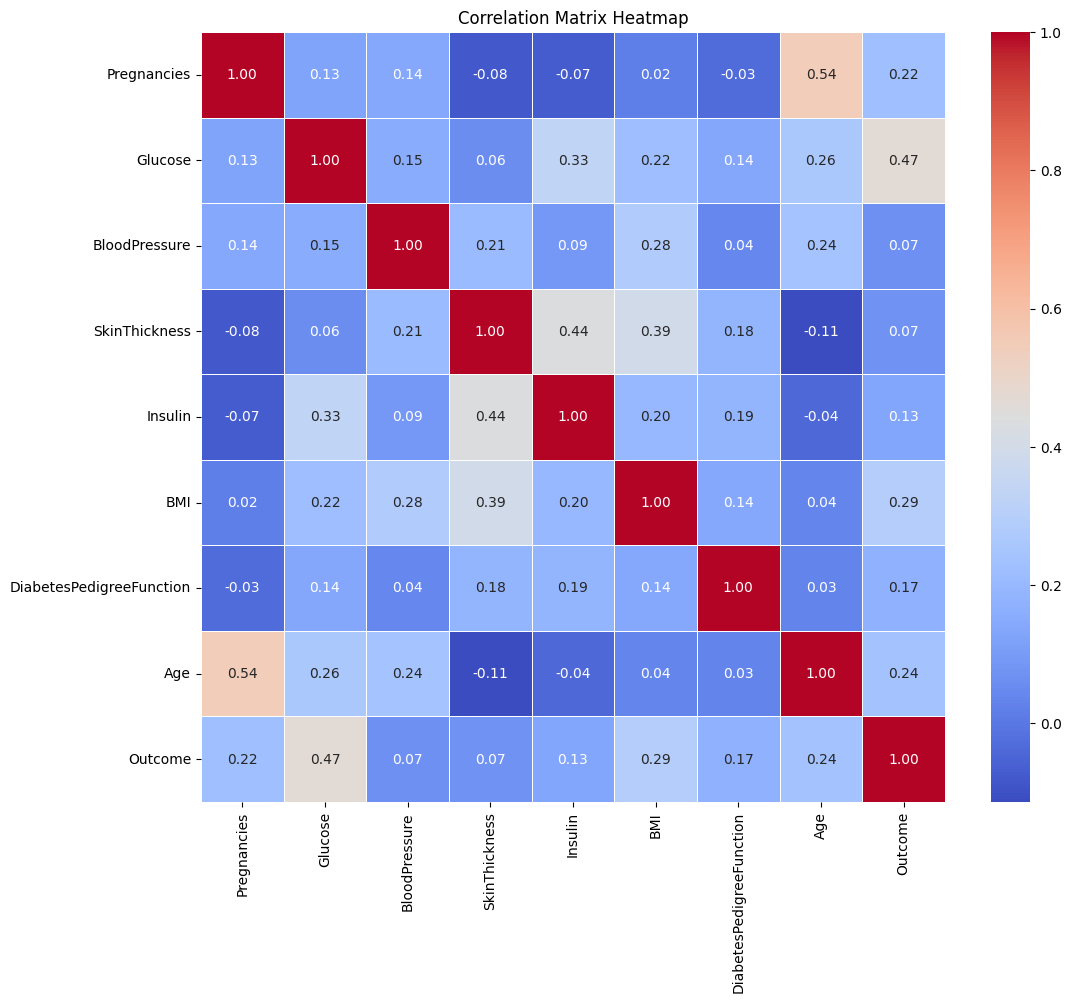

In [ ]:
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

**KNN**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train, acc_test

(0.8094462540716613, 0.7532467532467533)

In [ ]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[92,  8],
       [30, 24]])

In [ ]:
p = precision_score(y_test, y_pred_test)
p

0.75

In [ ]:
r = recall_score(y_test, y_pred_test)
r

0.4444444444444444

As evident from the results, the recall_score is unsatisfactory. By augmenting the value of k, we observe an improvement in the recall score. Therefore, increasing the value of k can enhance the recall performance for this dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train, acc_test


(0.7931596091205212, 0.7532467532467533)

In [ ]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[91,  9],
       [29, 25]])

In [ ]:
p = precision_score(y_test, y_pred_test)
p

0.7352941176470589

In [ ]:
r = recall_score(y_test, y_pred_test)
r

0.46296296296296297


When considering this code, if we contrast the recall metrics between the KNN and Naive Bayes models, it becomes apparent that the Naive Bayes model outperforms KNN on this dataset.

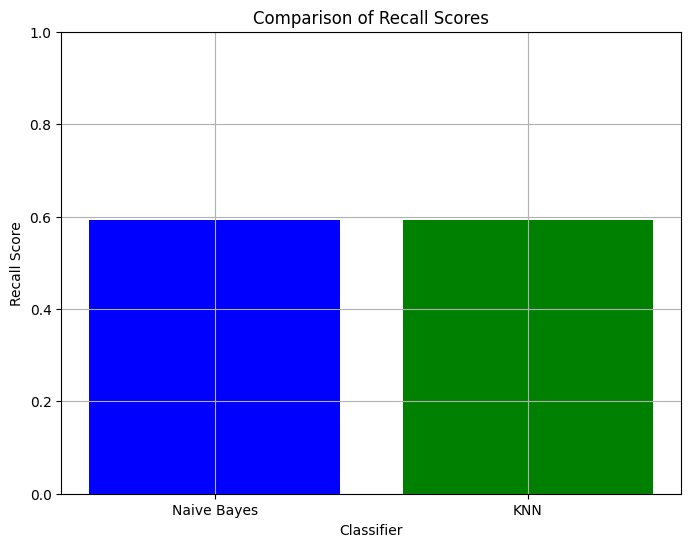

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score


naive_bayes = GaussianNB()
knn = KNeighborsClassifier()

naive_bayes.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Predictions for Naive Bayes
y_pred_nb = naive_bayes.predict(x_test)
y_pred_knn = knn.predict(x_test)

recall_nb = recall_score(y_test, y_pred_nb)
recall_knn = recall_score(y_test, y_pred_knn)


plt.figure(figsize=(8, 6))


plt.bar(['Naive Bayes', 'KNN'], [recall_nb, recall_knn], color=['blue', 'green'])

plt.title('Comparison of Recall Scores')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')

plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for better visualization
plt.grid(True)
plt.show()


**Decision Tree**

Building the model using DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

**Random Forest**

Building the model using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

Getting the accuracy score for Decision Tree and Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train_dt = dt.predict(x_train)
y_pred_train_rf = rf.predict(x_train)
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_train_dt, acc_train_rf


(0.9071661237785016, 1.0)

In [ ]:
y_pred_test_dt = dt.predict(x_test)
y_pred_test_rf = rf.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
acc_test_dt, acc_test_rf

(0.7662337662337663, 0.7402597402597403)


Based on the information provided, it's observed that while the Random Forest model achieves a perfect accuracy of 100% on the training data, its accuracy drops to 0.7467 on the test data. This indicates the model's tendency to overfit the training data. By introducing a maximum depth parameter, we anticipate observing alterations in the model's performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8)
rf.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
y_pred_train_dt = dt.predict(x_train)
y_pred_train_rf = rf.predict(x_train)
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_train_dt, acc_train_rf

(0.9071661237785016, 0.9625407166123778)

In [ ]:
y_pred_test_dt = dt.predict(x_test)
y_pred_test_rf = rf.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
acc_test_dt, acc_test_rf

(0.7662337662337663, 0.7272727272727273)

In [ ]:
from sklearn.metrics import recall_score

r_dt = recall_score(y_test, y_pred_test_dt)
r_rf = recall_score(y_test, y_pred_test_rf)

In [ ]:
r_dt, r_rf

(0.5740740740740741, 0.5370370370370371)

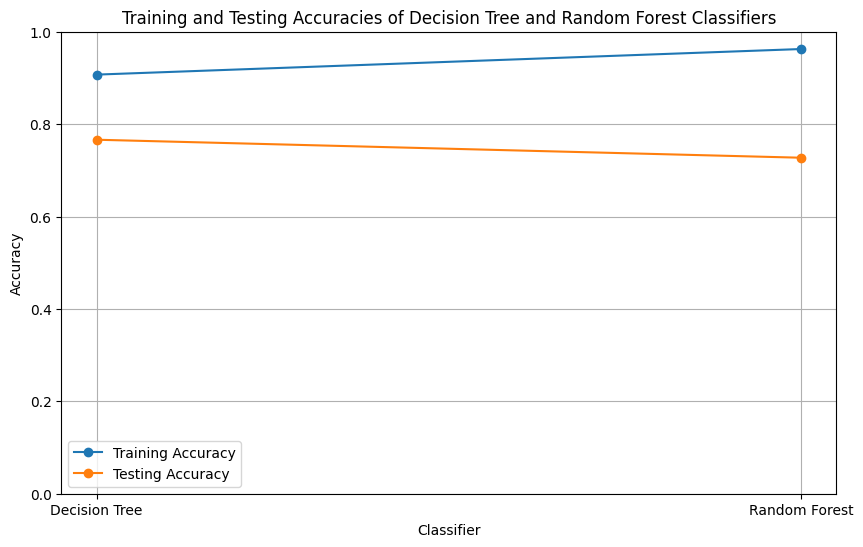

In [ ]:

train_accuracies = [acc_train_dt, acc_train_rf]
test_accuracies = [acc_test_dt, acc_test_rf]

plt.figure(figsize=(10, 6))

plt.plot(['Decision Tree', 'Random Forest'], train_accuracies, marker='o', label='Training Accuracy')

plt.plot(['Decision Tree', 'Random Forest'], test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Decision Tree and Random Forest Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.grid(True)
plt.show()


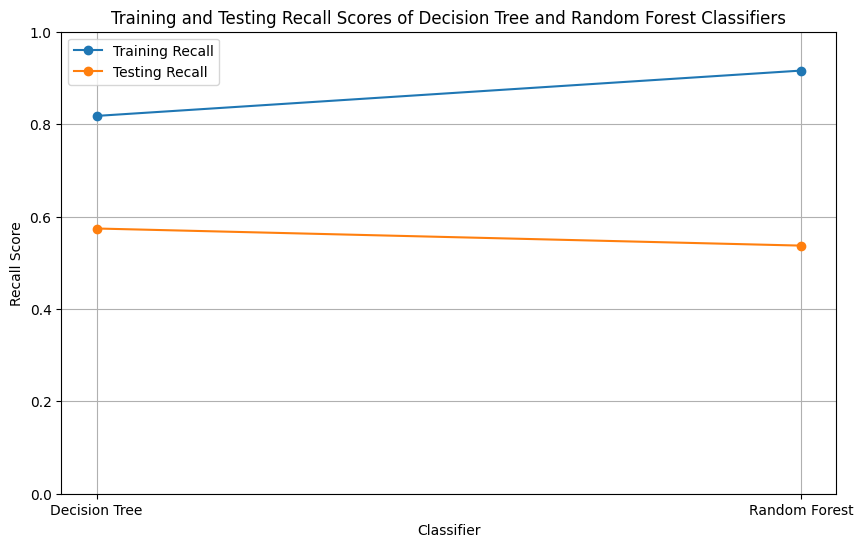

In [ ]:


# Recall scores for decision tree and random forest classifiers
train_recalls = [recall_score(y_train, dt.predict(x_train)), recall_score(y_train, rf.predict(x_train))]
test_recalls = [recall_score(y_test, dt.predict(x_test)), recall_score(y_test, rf.predict(x_test))]
plt.figure(figsize=(10, 6))
plt.plot(['Decision Tree', 'Random Forest'], train_recalls, marker='o', label='Training Recall')
plt.plot(['Decision Tree', 'Random Forest'], test_recalls, marker='o', label='Testing Recall')
plt.title('Training and Testing Recall Scores of Decision Tree and Random Forest Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.ylim(0, 1)
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_score

p_dt = precision_score(y_test, y_pred_test_dt)
p_rf = precision_score(y_test, y_pred_test_rf)

p_dt, p_rf




(0.7045454545454546, 0.6304347826086957)

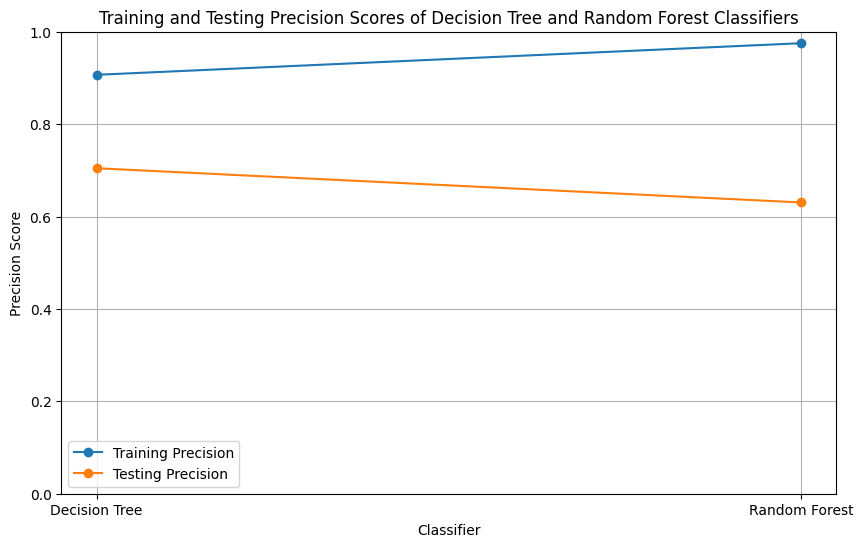

In [ ]:

train_precisions = [precision_score(y_train, dt.predict(x_train)), precision_score(y_train, rf.predict(x_train))]
test_precisions = [precision_score(y_test, dt.predict(x_test)), precision_score(y_test, rf.predict(x_test))]


plt.figure(figsize=(10, 6))

plt.plot(['Decision Tree', 'Random Forest'], train_precisions, marker='o', label='Training Precision')
plt.plot(['Decision Tree', 'Random Forest'], test_precisions, marker='o', label='Testing Precision')
plt.title('Training and Testing Precision Scores of Decision Tree and Random Forest Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.legend()

plt.grid(True)
plt.show()



Based on the information provided earlier, it is evident that Random Forest outperforms the Decision Tree model on this dataset.

**Support Vector Machine (SVM)**

Building the model using Support Vector Machine (SVM) with linear kernel

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

Prediction from support vector machine model on the traing and testing data

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Accuracy score , recall_score, and precision_score for SVM

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc_train = accuracy_score(y_train, y_pred = y_pred_train)
acc_test = accuracy_score(y_test, y_pred = y_pred_test)

acc_train, acc_test


(0.7785016286644951, 0.7727272727272727)

In [ ]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)

p, r

(0.7111111111111111, 0.5925925925925926)

Building the model using Support Vector Machine (SVM) with linear rbf

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf')
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc_train = accuracy_score(y_train, y_pred = y_pred_train)
acc_test = accuracy_score(y_test, y_pred = y_pred_test)

acc_train, acc_test




(0.8306188925081434, 0.7597402597402597)

In [ ]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)
p, r

(0.6976744186046512, 0.5555555555555556)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

acc_train, acc_test


(0.8306188925081434, 0.7597402597402597)

In [ ]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)

p, r

(0.6976744186046512, 0.5555555555555556)

**Comparing used models**

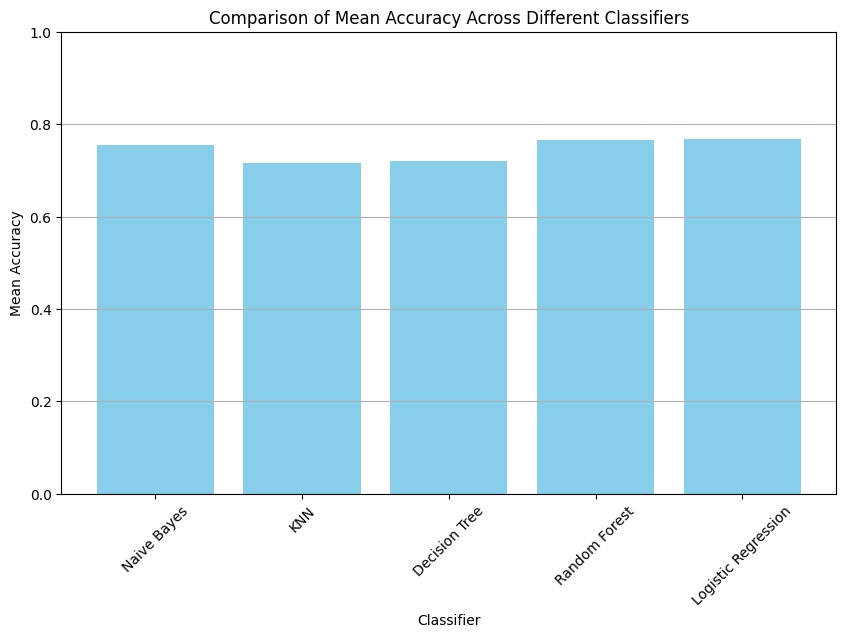

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Cross-validate each model and get accuracy scores
accuracy_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores[model_name] = scores.mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Mean Accuracy Across Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for better visualization
plt.grid(axis='y')
plt.show()


**Conclusion**

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum accurancy scores in the established models. Having utilized the entirety of the patient records, we've successfully constructed a machine learning model, particularly a Logestic Regrassion model, which effectively predicts the presence or absence of diabetes among the patients in the dataset. Additionally, through comprehensive data analysis and visualization, we've gleaned valuable insights from the data.

